<a href="https://colab.research.google.com/github/joyfulspace/ADP/blob/master/07_%EA%B8%B0%EA%B3%84%ED%95%99%EC%8A%B5_5_%EC%95%99%EC%83%81%EB%B8%94.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 랜덤 포레스트와 에이다부스트
### 앙상블 학습
- 노이즈에 강하지만 오버피팅 가능성 높음  

* 배깅: 같은 알고리즘을 사용하되 훈련 세트의 서브셋을 무작위로 구성하여 다르게 학습을 시키는 것 (일반 투표)
  - 랜덤 포레스트: 배깅+결정트리
    - 분류기에 인기. 회귀/군집분석에 응용 가능
* 부스팅: 정확도가 떨어지는 모델에 가중치를 주어 오류데이터에 대해 더 세심하게 분류한 모델 (가중치 투표)
  - 배깅보다 강력한 모델
  - 에이다부스트
    - 약한 모델에서 더 많은 표본을 가져옴
    - 강한 모델의 결과를 구할 때에도 모델에 따른 가중치에 따라서 취합을 하게 됨


## 분류 실습

In [ ]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

from sklearn import tree, ensemble
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score

In [ ]:
!git clone https://github.com/joyfulspace/ADP.git

Cloning into 'ADP'...
remote: Enumerating objects: 2485, done.
remote: Counting objects: 100% (2178/2178), done.
remote: Compressing objects: 100% (2172/2172), done.
remote: Total 2485 (delta 22), reused 2135 (delta 4), pack-reused 307
Receiving objects: 100% (2485/2485), 55.94 MiB | 24.80 MiB/s, done.
Resolving deltas: 100% (144/144), done.
Checking out files: 100% (2398/2398), done.


In [ ]:
# 중산층 소비지출 데이터 가져오기
middle = pd.read_csv('ADP/data/middle.csv')
middle.head()

,food,book,cul,cloth,travel,status
0,0.263017,0.759435,0.472159,0.365709,0.331119,1
1,0.192398,0.514150,0.222987,0.388257,0.307846,1
2,0.513997,0.448345,0.554666,0.394886,0.363455,0
3,0.387733,0.582956,0.425999,0.349615,0.197456,1
4,0.421674,0.560781,0.430536,0.734413,0.352037,0


In [ ]:
X = middle.iloc[:, [0,1,2,3,4]].values
y = middle.iloc[:, 5].values

In [ ]:
X.shape, y.shape

((100, 5), (100,))

In [ ]:
# 데이터 정규화
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)

X_regu = scaler.transform(X)

In [ ]:
X_regu.shape, type(X_regu)

((100, 5), numpy.ndarray)

In [ ]:
# 랜덤포레스트 분류기
classifier = ensemble.RandomForestClassifier(n_estimators=20, max_depth=3, criterion='gini') #트리 20개, 트리의 depth 3, 
classifier.fit(X_regu, y)

RandomForestClassifier(max_depth=3, n_estimators=20)

In [ ]:
expected = y
predicted = classifier.predict(X_regu)

In [ ]:
predicted

array([1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1])

In [ ]:
print('Accuracy:', accuracy_score(expected, predicted))
print('Confusion matrix:\n', confusion_matrix(expected, predicted))

Accuracy: 0.85
Confusion matrix:
 [[16 15]
 [ 0 69]]


In [ ]:
# 에이다부스트 모델
classifier2 = ensemble.AdaBoostClassifier(base_estimator=tree.DecisionTreeClassifier(max_depth=3), n_estimators=20) # base모델은 결정트리
classifier2.fit(X_regu, y)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3),
                   n_estimators=20)

In [ ]:
predicted2 = classifier2.predict(X_regu)

print('Accuracy:', accuracy_score(expected, predicted2))
print('Confusion matrix:\n', confusion_matrix(expected, predicted2))

Accuracy: 1.0
Confusion matrix:
 [[31  0]
 [ 0 69]]


## 예측 실습
* 당뇨병 환자 예측

In [ ]:
from sklearn import datasets

diabetes = datasets.load_diabetes()

In [ ]:
# 독립변수와 반응변수로 구분
diabetes_X = diabetes.data
diabetes_y = diabetes.target
diabetes_feature = diabetes.feature_names

In [ ]:
diabetes_X.shape, diabetes_y.shape

((442, 10), (442,))

In [ ]:
diabetes_feature

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [ ]:
# 랜덤포레스트 회귀모델
model = ensemble.RandomForestRegressor()
model.fit(diabetes_X, diabetes_y)

RandomForestRegressor()

In [ ]:
# 결정계수 표시
r2 = model.score(diabetes_X, diabetes_y)
print('결정계수', r2)

결정계수 0.9184476430061543


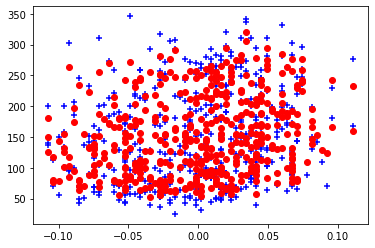

In [ ]:
# 그래프 표시 - age
plt.scatter(diabetes_X[:, 0], diabetes_y, marker='+', c='blue')
plt.scatter(diabetes_X[:, 0], model.predict(diabetes_X), marker='o', c='red')
plt.show()

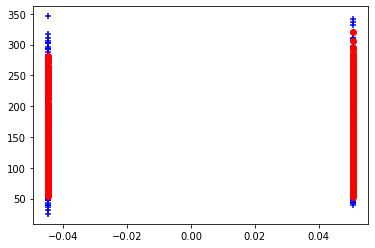

In [ ]:
# 그래프 표시 - sex
plt.scatter(diabetes_X[:, 1], diabetes_y, marker='+', c='blue')
plt.scatter(diabetes_X[:, 1], model.predict(diabetes_X), marker='o', c='red')
plt.show()

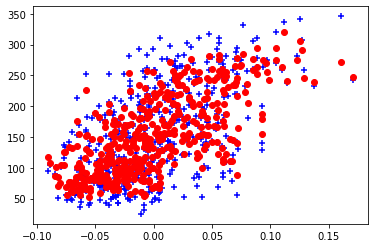

In [ ]:
# 그래프 표시 - bmi
plt.scatter(diabetes_X[:, 2], diabetes_y, marker='+', c='blue')
plt.scatter(diabetes_X[:, 2], model.predict(diabetes_X), marker='o', c='red')
plt.show()